<a href="https://colab.research.google.com/github/narfy89/ProyFinal_WBDSCamp_NoeliaFloridia/blob/main/WBDS_ProyectoFinal_NoeliaFloridia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Script para dibujar minicírculos de kDNA**

Los protozoos del grupo Kinetoplastida contienen en su única y gran mitocondria un cúmulo de ADN: el ADN kinetoplastídico (ADNk). Este se organiza en una compleja red de maxicírculos y minicírculos concatenados. Los maxicírculos codifican para genes relacionados a la cadena respiratoria, siendo algunos de estos criptogenes que requieren edición. Mientras que, los minicírculos codifican para ARN guías que intervienen en la edición de los mensajeros codificados por los criptogenes de los maxicírculos para generar transcriptos funcionales. Particularmente los minicírculos estan organizados en una o mas regiones conservadas intercaladas por una o mas regiones hipervariables, en estas últimas están codificados los ARN guías. Las regiones conservadas poseen siempre tres bloques conservados, uno de ellos es el bloque CSB-3 de 12 pb, que esta universalmente conservado en todos los kinetoplastidos. Los otros bloques, CSB-1 y CSB-2 pueden diferir en algunos nucleótidos entre las distintas especies. En este script nos interesa a partir de una secuencia de minicírculo de un determinado kinetoplastido, identificar el bloque CSB-3 a fines de saber cuantas regiones conservadas tiene el minicírculo y por lo tanto cuantas hipervariables. Esto nos permitirá, en el caso de ser una especie con una estructura de minicirculo conocida chequear la presencia de los bloques. En el caso de una especie cuyos minicirculos no hayan sido descriptos, podriamos identificar los bloques y tener una idea preliminar de la estructura de los mismos. Por último, el script nos permite obtener un gráfico del minicírculo identificando la posición del/de los bloque/s CSB-3.

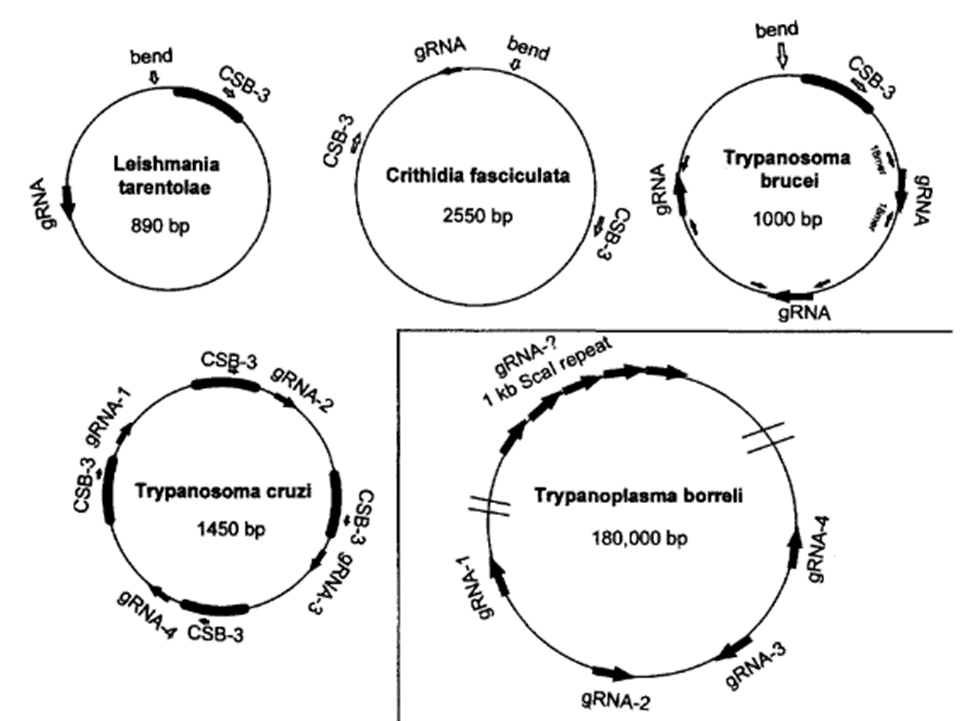
Imagen de Ray 1989

# **0.Preparacion del entorno**
Para que el notebook funcione se debe llenar el archivo credentials.py con tu correo electrónico y la API key que proporciona NCBI a sus usuarios registrados de la siguiente forma:

```
# from Bio import Entrez
Entrez.email   = "XXXX@gmail.com"
Entrez.api_key = "XXXXXXX"
```

Luego debes subir ese archivo al almacenamiento de la sesión. A continuación se deben instalar los siguientes paquetes:

In [ ]:

!pip3 install pandas
!pip3 install pycirclize
!pip3 install biopython


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import credentials
import pandas as pd
import numpy as np
from pycirclize import Circos
from Bio import SeqIO
from Bio import Entrez
import matplotlib.pyplot as plt
from pycirclize.utils import calc_group_spaces, ColorCycler


#**1. Carga de la secuencia de minicirculo kinetoplastidico a analizar** 
En primer lugar, cargaremos el id de Genebank de la secuencia del minicírculo de ADN kinetoplastidico a analizar. Sustituye la secuencia de prueba "M15511.1" por una secuencia de minicírculo que te interese analizar.

In [ ]:
# INTRODUZCA AQUI EL ID DE LA SECUENCIA DE MINICIRCULOS DE GENEBANK
id_mini = "M15511.1"

In [ ]:
accession = id_mini
minicirculo = Entrez.efetch(db="nucleotide",
                       id=accession,
                       format="gb",
                       rettype="text")
seq_record = SeqIO.read(minicirculo, "genbank")
minicirculo_length = len(seq_record.seq)

filename = f"{id_mini}.fasta"
with open(filename, "w") as output_file:
  SeqIO.write(seq_record, output_file, "fasta")

# **2. Búsqueda del bloque conservado CSB-3**

In [ ]:
#El bloque conservado en todos los minicírculos es el bloque de 12 pb llamado CSB3 (tambien llamada UMS, Universal Minicircle Sequence, es compartida por todos los kinetoplastidos).
#Definimos tambien su reversa complementaria para poder buscar el bloque en ambas hebras del minicírculo

csb_3 = "GGGGTTGGTGTA"
csb_3_rc ="TACACCAACCCC"



In [ ]:

# abrimos el FASTA del minicírculo que queremos analizar
with open(f"{id_mini}.fasta", "r") as mini_fasta:
    mini_fasta.readline()
    mini_fasta_contenido = mini_fasta.read().replace('\n', '')

    if csb_3 in mini_fasta_contenido:
        resaltar_secuencia = mini_fasta_contenido.replace(csb_3, f"***{csb_3}***")
        print("El CSB-3 fue hallado:")
        print(resaltar_secuencia)
        print("Número de bloques conservados por minicirculo:")
        print(resaltar_secuencia.count(csb_3))

    else:
        print("El CSB-3 no se encuentra en en minicirculo")

El CSB-3 fue hallado:
TGCAGAAGAGTTTTAGGATTTTATTGGATGCGTATGTATGATGTCGTTACGGTGTACTATGAGTTTGTTCTTAGTAGTGTTAATGTGATTTGTTATAATTTGATGTGTATGCTGTATAATGTGTTAACTATAATTGAATGGTGGTAGTGGTATATTGTTGGGAGTGATGGTGATGTTATTGTTGCAGAAATTGTCCGGAAAAATTCCAGAAAATCCTGATTTGGGAGGGGGCGTCAGATTTTGGGCGGGAAATTCATGCATCTCACCCGTACATTATTTTGGTATTTTAGGGGGTTGTCACGCCGAGGTGGGGTTCGATT***GGGGTTGGTGTA***ATATAGACAGATTGTTCAGAATTGTTAATAGTGGTTTTGATTATTGAATGTATGTTCCGTGTTGTGATGATTGATGTTGACGAGGCCAGAGATAAGGTTGTTGAGAATGTTTATAGGATTTTGATTGTATAGTTTAAATGATAAGTATTATGTTATTAATTTAATTTAGGAGGTGGGTAGGGTAGAATATATGGTTGTATGGTTGAAGATGGATATATGTTATTGGATATTGAGGGCTAAAATTACGTGAATGTTGTGTTTTGGGAGGGGGCGTCAAATTTCAGGGCCTAAATTCATGCATCTCACCCGTACATTATTTATCGAATTTGTGGATTTTTACGAGGAGGTGGGGTTCGATT***GGGGTTGGTGTA***ATATAGACAGAGTGTGGGTTAATGATGGTGTATGTTTGTTTTGAGTGCTATGATAGATGTCTATAGAGACCTTGTATGTATGAAGATGAAGATCTAGTAAGTTTATGTTGTTTGTTGTTTGAAGTTTAGTACATGTGTTAAACGTATACTATAGGTTGGTGTGGGTTGTGTTAATGGTGTATGAGTACAATCTTGAAAAATATTGAGGTTAAAAATTCACGGAAAGTTGGTTTTTGGGAGGGGGCGTCAAATTTGGGGCCGGA

# **3. Obtención de un dataframe descriptivo del minicírculo**
Obtendremos una tabla con la descripción de los sectores del minicirculo en base a la presencia del bloque conservado. Para ello, ya sabiendo cuantos bloques conservados encontramos en la secuencia, la dividiremos en sectores a lo largo se la secuencia en base a la presencia de csb-3 usando el metodo .split()
Al ser una secuencia circular, el noveno sector en el que se podria dividir esta secuencia es en realidad contiguo con el primero asi que los uniremos de la siguiente forma:

In [ ]:

sectores = mini_fasta_contenido.split(csb_3)
sectores



['TGCAGAAGAGTTTTAGGATTTTATTGGATGCGTATGTATGATGTCGTTACGGTGTACTATGAGTTTGTTCTTAGTAGTGTTAATGTGATTTGTTATAATTTGATGTGTATGCTGTATAATGTGTTAACTATAATTGAATGGTGGTAGTGGTATATTGTTGGGAGTGATGGTGATGTTATTGTTGCAGAAATTGTCCGGAAAAATTCCAGAAAATCCTGATTTGGGAGGGGGCGTCAGATTTTGGGCGGGAAATTCATGCATCTCACCCGTACATTATTTTGGTATTTTAGGGGGTTGTCACGCCGAGGTGGGGTTCGATT',
 'ATATAGACAGATTGTTCAGAATTGTTAATAGTGGTTTTGATTATTGAATGTATGTTCCGTGTTGTGATGATTGATGTTGACGAGGCCAGAGATAAGGTTGTTGAGAATGTTTATAGGATTTTGATTGTATAGTTTAAATGATAAGTATTATGTTATTAATTTAATTTAGGAGGTGGGTAGGGTAGAATATATGGTTGTATGGTTGAAGATGGATATATGTTATTGGATATTGAGGGCTAAAATTACGTGAATGTTGTGTTTTGGGAGGGGGCGTCAAATTTCAGGGCCTAAATTCATGCATCTCACCCGTACATTATTTATCGAATTTGTGGATTTTTACGAGGAGGTGGGGTTCGATT',
 'ATATAGACAGAGTGTGGGTTAATGATGGTGTATGTTTGTTTTGAGTGCTATGATAGATGTCTATAGAGACCTTGTATGTATGAAGATGAAGATCTAGTAAGTTTATGTTGTTTGTTGTTTGAAGTTTAGTACATGTGTTAAACGTATACTATAGGTTGGTGTGGGTTGTGTTAATGGTGTATGAGTACAATCTTGAAAAATATTGAGGTTAAAAATTCACGGAAAGTTGGTTTTTGGGAGGGGGCGTCAAATTTGGGGCCGGAAATTCATGCATCTCACCCGTACATTATTTTGGGATTTTGGCGGAAT

In [ ]:

primer_sector = sectores[4] + sectores[0] 
segundo_sector = csb_3 
tercer_sector = sectores[1]
cuarto_sector = csb_3 
quinto_sector = sectores[2]
sexto_sector= csb_3
septimo_sector = sectores[3]
octavo_sector = csb_3


mini_sectores_dic = {
    "Sector del minicírculo": [
        "Primer sector",
        "Segundo sector",
        "Tercer sector",
        "Cuarto sector",
        "Quinto sector",
        "Sexto sector",
        "Séptimo sector",
        "Octavo sector",
        
    ],
    "Secuencia": [
        primer_sector,
        segundo_sector,
        tercer_sector,cuarto_sector,quinto_sector,sexto_sector,septimo_sector,octavo_sector], 
    "Largo": [
        (len(sectores[0]) + len(sectores[4])),
        len(csb_3),
        len(sectores[1]),
        len(csb_3),
        len(sectores[2]),
        len(csb_3),
        len(sectores[3]),
        len(csb_3)]
}
print(mini_sectores_dic)

{'Sector del minicírculo': ['Primer sector', 'Segundo sector', 'Tercer sector', 'Cuarto sector', 'Quinto sector', 'Sexto sector', 'Séptimo sector', 'Octavo sector'], 'Secuencia': ['ATATAGTGATTTGATTGCAGAAGAGTTTTAGGATTTTATTGGATGCGTATGTATGATGTCGTTACGGTGTACTATGAGTTTGTTCTTAGTAGTGTTAATGTGATTTGTTATAATTTGATGTGTATGCTGTATAATGTGTTAACTATAATTGAATGGTGGTAGTGGTATATTGTTGGGAGTGATGGTGATGTTATTGTTGCAGAAATTGTCCGGAAAAATTCCAGAAAATCCTGATTTGGGAGGGGGCGTCAGATTTTGGGCGGGAAATTCATGCATCTCACCCGTACATTATTTTGGTATTTTAGGGGGTTGTCACGCCGAGGTGGGGTTCGATT', 'GGGGTTGGTGTA', 'ATATAGACAGATTGTTCAGAATTGTTAATAGTGGTTTTGATTATTGAATGTATGTTCCGTGTTGTGATGATTGATGTTGACGAGGCCAGAGATAAGGTTGTTGAGAATGTTTATAGGATTTTGATTGTATAGTTTAAATGATAAGTATTATGTTATTAATTTAATTTAGGAGGTGGGTAGGGTAGAATATATGGTTGTATGGTTGAAGATGGATATATGTTATTGGATATTGAGGGCTAAAATTACGTGAATGTTGTGTTTTGGGAGGGGGCGTCAAATTTCAGGGCCTAAATTCATGCATCTCACCCGTACATTATTTATCGAATTTGTGGATTTTTACGAGGAGGTGGGGTTCGATT', 'GGGGTTGGTGTA', 'ATATAGACAGAGTGTGGGTTAATGATGGTGTATGTTTGTTTTGAGTGCTATGATAGATGTCTATAGAGACCTTGTATGTATGAAG

In [ ]:
sectores_mini_df = pd.DataFrame(mini_sectores_dic, columns = ["Sector del minicírculo","Secuencia", "Largo"])

In [ ]:
sectores_mini_df

,Sector del minicírculo,Secuencia,Largo
0,Primer sector,ATATAGTGATTTGATTGCAGAAGAGTTTTAGGATTTTATTGGATGC...,335
1,Segundo sector,GGGGTTGGTGTA,12
2,Tercer sector,ATATAGACAGATTGTTCAGAATTGTTAATAGTGGTTTTGATTATTG...,359
3,Cuarto sector,GGGGTTGGTGTA,12
4,Quinto sector,ATATAGACAGAGTGTGGGTTAATGATGGTGTATGTTTGTTTTGAGT...,332
5,Sexto sector,GGGGTTGGTGTA,12
6,Séptimo sector,ATATAGGCGTGGGTGTGAGTATAGATTGAATGTTATTTTGATTTTG...,356
7,Octavo sector,GGGGTTGGTGTA,12


# **4. Obtención del gráfico representativo del minicírculo** 


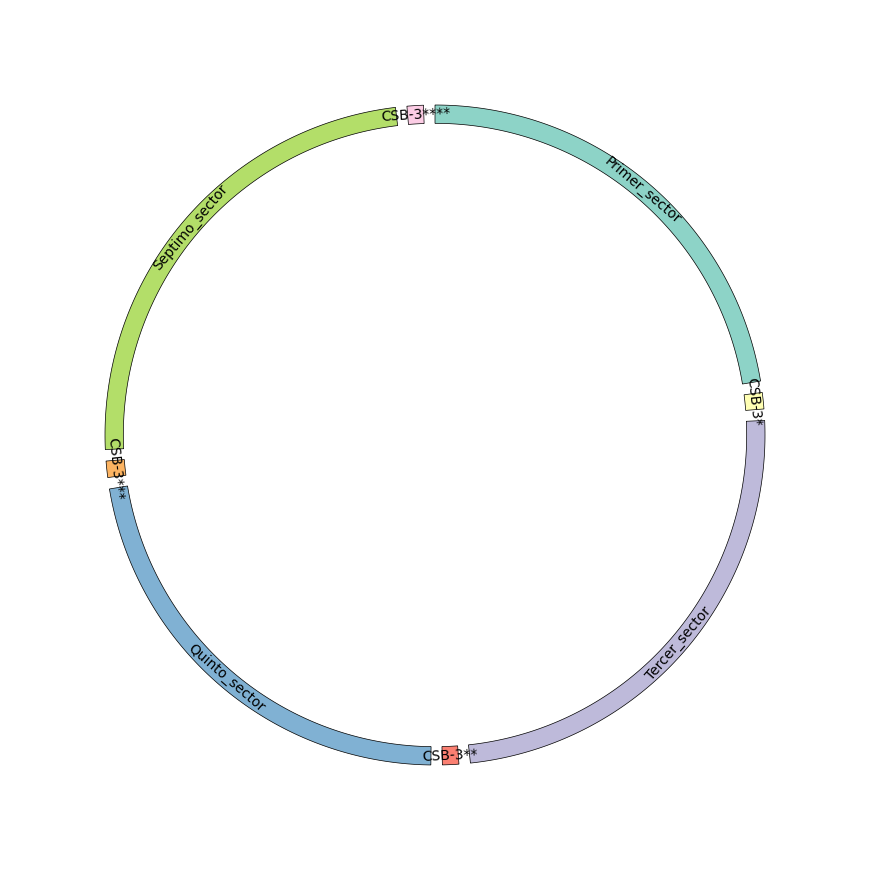

In [ ]:

sectors = {
           'Primer_sector': len(sectores[0]) + len(sectores[4]), 
            'CSB-3*': len(csb_3),
            'Tercer_sector': len(sectores[1]),
            'CSB-3**': len(csb_3),
            'Quinto_sector': len(sectores[2]),
            'CSB-3***': len(csb_3),
            'Septimo_sector': len(sectores[3]),
            'CSB-3****': len(csb_3),
}


circos = Circos(sectors, space=2)

ColorCycler.set_cmap("Set3")
for sector in circos.sectors:
    track = sector.add_track(r_lim=(85, 90))
    track.axis(fc=ColorCycler())
    track.text(sector.name)



fig = circos.plotfig()
plt.savefig("_plot.png")
